In [58]:
#Task 1
from math import sqrt

class knn:
    
    def __init__(self,k,trainingDataFeatures,trainingDataLabels):
        self.k = k
        self.trainingDataLabels = trainingDataLabels 
        self.trainingDataFeatures = trainingDataFeatures
    def __distanceformula(self,actualX,observerX):  #euclidean distance formula implementation
        distance = 0.0
        for i in range(len(actualX)):
            distance += ((actualX[i] - observerX[i])**2)
            #print(f"({actualX[i]} - {observerX[i]})^2", end = "")
            #if i < len(actualX)-1:
                #print(" + ",end="")
        #print(f" = {round(sqrt(distance),3)}")
        return round(sqrt(distance),3)
        
        
    def __Kminimum(self,distanceList):  #takes the list of distance along with labels and return the k number of minimum distances
        kminimumList = []
        value1 = None
        while (len(kminimumList) < self.k): 
            minimum = 9999
            for i in range(len(distanceList)):
                dummy1 = distanceList[i][0]
                dummy2 = distanceList[i][1]
                if dummy1 < minimum:
                    minimum = dummy1
                    label = dummy2
            
            kminimumList.append((minimum,label))
            distanceList.remove((minimum,label))
            
        return kminimumList
    
    def __label_Count(self,miniList):
        labelcount = {}
        for i in range(len(miniList)):
            label =  miniList[i][1]
            if label not in labelcount:
                labelcount[label] = 0
                labelcount[label]+=1
            else:
                labelcount[label]+=1
        return labelcount
        
    
        
    def knnalgo_predictor(self,ox1):
        distance=[]
        labelHeader = next(iter(self.trainingDataLabels))
        for i in range(len(list(self.trainingDataFeatures.values())[0])): #looping through all training data
            trainingValue = []
            for header in (self.trainingDataFeatures):
                trainingValue.append(self.trainingDataFeatures[header][i])
            singleDistance = self.__distanceformula(trainingValue,ox1)
            distance.append((singleDistance,self.trainingDataLabels[labelHeader][i]))
            

        mini = self.__Kminimum(distance) #calling kminimum function
        print("minimum",mini)
        labelcount = self.__label_Count(mini)
          
        print(labelcount)
        maxx = 0
        maxLabel = None
        for label,count in labelcount.items():
            if count > maxx:
                maxx = count
                maxLabel = label
            
        return {"features":ox1,"predicted_label": maxLabel}
            
        

------------------K ===== 1
---------------Testing Data # 1----------------------
minimum [(0.671, 1)]
{1: 1}
{'features': [172.0, 7.4, 7.0, 0.89], 'predicted_label': 1}
---------------Testing Data # 2----------------------
minimum [(2.049, 1)]
{1: 1}
{'features': [164.0, 7.2, 7.0, 0.8], 'predicted_label': 1}
---------------Testing Data # 3----------------------
minimum [(1.47, 3)]
{3: 1}
{'features': [180.0, 8.0, 6.8, 0.59], 'predicted_label': 3}
---------------Testing Data # 4----------------------
minimum [(2.104, 3)]
{3: 1}
{'features': [178.0, 7.1, 7.8, 0.92], 'predicted_label': 3}
---------------Testing Data # 5----------------------
minimum [(0.145, 3)]
{3: 1}
{'features': [154.0, 7.2, 7.2, 0.82], 'predicted_label': 3}
---------------Testing Data # 6----------------------
minimum [(2.091, 1)]
{1: 1}
{'features': [164.0, 7.3, 7.7, 0.7], 'predicted_label': 1}
---------------Testing Data # 7----------------------
minimum [(0.01, 4)]
{4: 1}
{'features': [762.039, 7.3, 7.712, 0.71], 

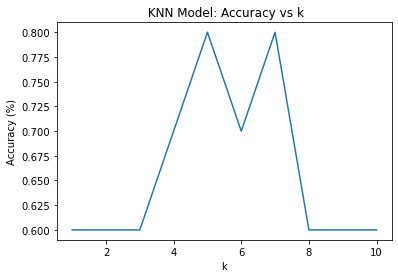

In [60]:
#Task2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

def Accuracy(testList,predictedList):
    return sum(1 for x,y in zip(testList,predictedList) if x == y) / len(testList)
            
path = "fruit_data_with_colors.csv"
data = pd.read_csv(path) #assumes data has header
accuracyList = []
data = data.select_dtypes(exclude=['object']) #removing unneccessary columns
data.head()
for i in data:               #replacing empty values with the mean
    meann = data[i].mean()
    meann = round(meann,3)
    data[i].replace(np.nan, meann , inplace = True)
    
train, test = train_test_split(data, test_size=0.16,shuffle=True) #splitting data into tests and training
trainLabel = train.filter(regex = 'fruit_label',axis = 1) #separeting the label column so that it can be passed independently 
trainLabelDict = trainLabel.to_dict('list')  #converting the train label dataframe to a dictionary
train.drop('fruit_label',axis = 1,inplace = True)#dropping the label column from training

testLabel = test.filter(regex = 'fruit_label',axis = 1)#separeting the label column so that it can be used independently 
testLabelList = testLabel['fruit_label'].tolist() #converting the test labels dataframe to a dictionary
test.drop('fruit_label',axis = 1,inplace = True) #dropping the label column from test

trainFeatureDict = train.to_dict('list') #converting the train feature dataframe to a dictionary
testDict = test.to_dict('list') #converting the test dataframe to a dictionary

k = 1
while k<=10:
    print(f"------------------K ===== {k}")
    kn = knn(k,trainFeatureDict,trainLabelDict) #creating the instance of knn with training data(label+feature)
    predictedLabels = []
    for i in range(len(list(testDict.values())[0])):  #Testing training data with test data
        testingValue = []
        for header in testDict:
            testingValue.append(testDict[header][i])

        print(f"---------------Testing Data # {i+1}----------------------")
        pValue = kn.knnalgo_predictor(testingValue)
        print(pValue)
        predictedLabels.append(pValue["predicted_label"])
        


            
    print("predicted label",predictedLabels)
    print("Test actual labels",testLabelList)
    acc = Accuracy(testLabelList,predictedLabels)
    accuracyList.append(acc)
    print(f"acc for k = {k} is {acc}\n\n\n\n")
    k+=1
    
x = [i for i in range(1,k)]
y = accuracyList
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title(' KNN Model: Accuracy vs k')
plt.plot(x,y)